# Multiples

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [90]:
import numpy as np

In [91]:
from lint_analysis.bin_counts import cache

In [96]:
tokens = cache.token_counts(10000)

In [97]:
from collections import OrderedDict

tokens = OrderedDict([
    (t, c) for t, c in tokens.items()
    if not re.match('^[0-9ivx.]+$', t)
])

In [99]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    
    series = cache.token_series(token)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [100]:
import pandas as pd

df = pd.DataFrame(
    data,
    columns=('count', 'var', 'exp'),
    index=tokens.keys(),
)

In [101]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

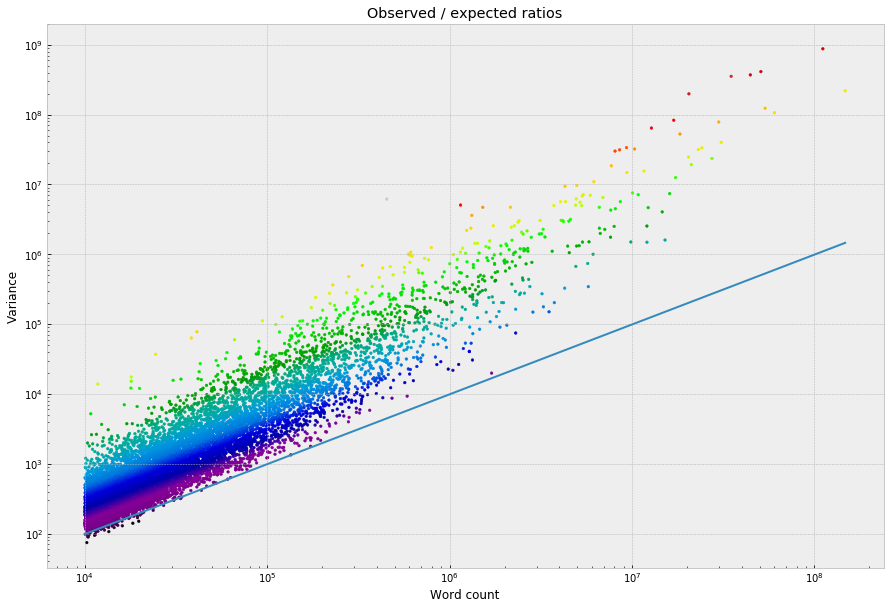

In [102]:
plt.figure(figsize=(15, 10))

plt.title('Observed / expected ratios')
plt.xlabel('Word count')
plt.ylabel('Variance')
plt.xscale('log')
plt.yscale('log')

norm = mpl.colors.LogNorm(
    vmin=df['score'].min(),
    vmax=df['score'].max(),
)

plt.scatter(
    df['count'], df['var'],
    s=7, c=df['score'],
    cmap='spectral', norm=norm,
)

plt.plot(df['count'], df['exp'])

plt.show()

In [133]:
t200 = df.sort_values('score', ascending=False).head(500).index

t200_colors = df.index.map(lambda t: 'blue' if t in t200 else 'gray')

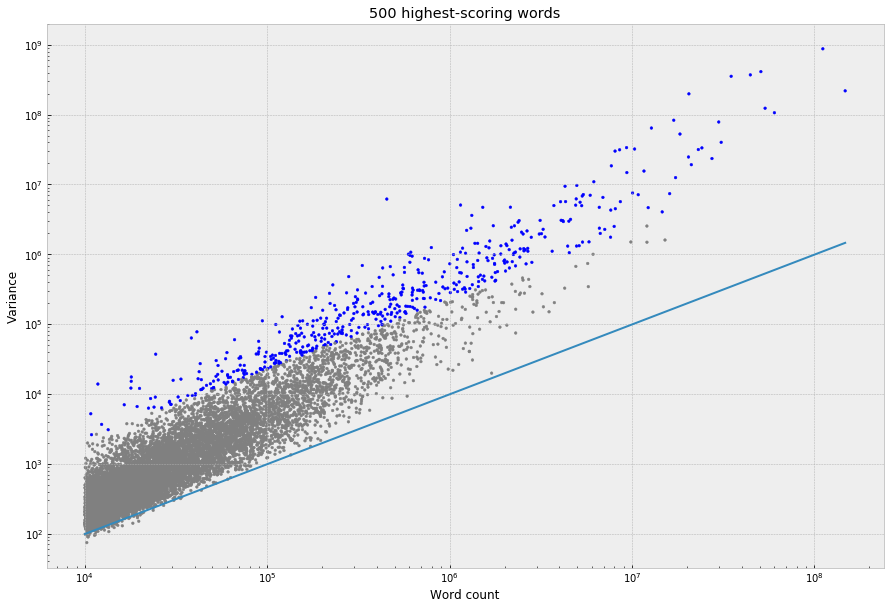

In [135]:
plt.figure(figsize=(15, 10))

plt.title('500 highest-scoring words')
plt.xlabel('Word count')
plt.ylabel('Variance')
plt.xscale('log')
plt.yscale('log')

norm = mpl.colors.LogNorm(
    vmin=df['score'].min(),
    vmax=df['score'].max(),
)

plt.scatter(
    df['count'], df['var'],
    s=7, c=t200_colors,
)

plt.plot(df['count'], df['exp'])

plt.show()

In [132]:
def multiples(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    figsize = (cols*2, rows*2)
    
    # Make the figure + axes.
    fig, axarr = plt.subplots(rows, cols, figsize=(cols*2, rows*1.5))
    fig.tight_layout(pad=2)
    
    for i, token in enumerate(tokens):
        
        # Select the axis for the next plot.
        ax = axarr[math.floor(i/cols)][i%cols] if rows > 1 else axarr[i%cols]
        
        # Configure axes.
        ax.set_title(token, fontsize=10)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
    
        series = cache.token_series(token)

        ax.hist(
            np.arange(len(series)),
            weights=series,
            bins=len(series),
            zorder=3,
        )

    plt.show()

In [107]:
top = df.sort_values('score', ascending=False).head(200)

In [108]:
from scipy.ndimage.measurements import center_of_mass

top['com'] = top.index.map(lambda t: center_of_mass(cache.token_series(t)))

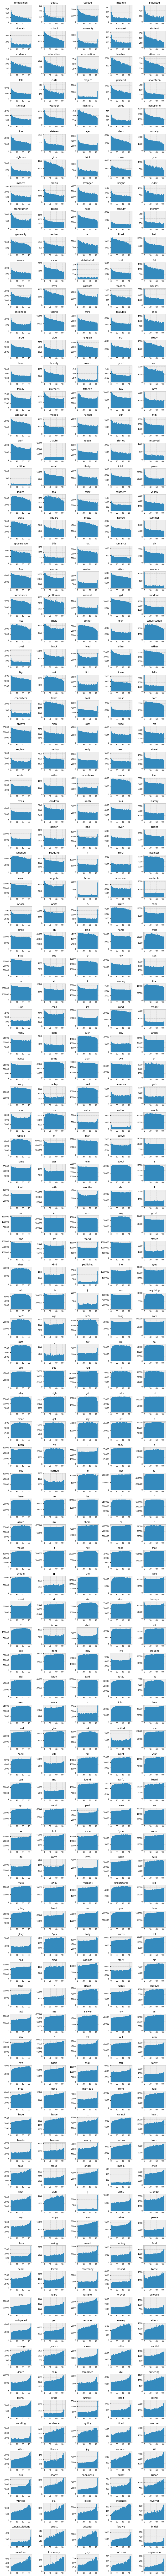

In [109]:
multiples(top.sort_values('com').index, cols=5)